In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

## Estimation for Niger

In [18]:
#InputFiles = {'Expenditures':('1_kHhI_JJXuRb7FLZFTsO3j3Aa8emvQBro1SYlB6lVY8','Expenditures'),
              #'Consumption':('1gJN0_U1CSRuS_LfAG_cEmYzqAjdM8gQEgQaFzzzriME','Consumption'),
              #'HH Characteristics':('1_kHhI_JJXuRb7FLZFTsO3j3Aa8emvQBro1SYlB6lVY8','HH Characteristics'),
              #'FCT':('1TM7FpKURXFAuXW4dLpGt98QA2CH4WTDty-4nPOUv1Mg','05 NV_sum_57 (per 100g EP)')}
            
Niger_data_EX_HH = '1czBgkaoR5cFjTYI1fiomSsFwCeKUmPwR9zFmdHM--e8'

In [4]:
x = read_sheets(Niger_data_EX_HH,sheet='Expenditures')
x.columns.name = 'j'
                 
d = read_sheets(Niger_data_EX_HH,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
d.head()

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,t,m,,,,,,,,,,,,,,
101,2011,Niger,0,0,0,1,1,0,1,0,1,0,1,0,1,0
102,2011,Niger,1,0,0,0,0,1,0,1,0,0,0,1,0,0
103,2011,Niger,1,0,1,0,0,0,1,2,1,1,0,1,0,0
104,2011,Niger,1,0,0,0,1,0,0,0,0,0,0,1,0,0
105,2011,Niger,0,0,0,0,1,1,0,0,1,1,0,0,1,0


In [6]:
y.head()

,,j,Alcoholic beverages,Alcoholic beverages taken out of home,Bambara groundnut,Baobab leaves,Bean fritters,Beans,Beef,Biscuit,Boiled beans,Bowl of millet with milk,...,Sweet potato,Taro and cocoyam,Tea bag,Tea hot drink,Tomato paste,Watermelon,Wheat flour,Yam tuber,Yodo,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
101,2011,Niger,NaN,NaN,NaN,NaN,4.60517,5.521461,NaN,NaN,6.214608,NaN,...,NaN,NaN,5.703782,NaN,NaN,NaN,NaN,NaN,NaN,5.991465
102,2011,Niger,NaN,NaN,NaN,6.214608,NaN,6.745236,8.294050,NaN,6.907755,6.214608,...,NaN,NaN,NaN,NaN,6.745236,NaN,NaN,NaN,NaN,6.907755
103,2011,Niger,NaN,NaN,NaN,NaN,4.60517,NaN,6.214608,NaN,6.214608,NaN,...,NaN,NaN,6.214608,NaN,5.703782,NaN,NaN,NaN,NaN,6.551080
104,2011,Niger,NaN,NaN,NaN,NaN,NaN,NaN,7.600902,NaN,6.214608,5.703782,...,NaN,NaN,NaN,NaN,6.774224,NaN,NaN,NaN,NaN,6.214608
105,2011,Niger,NaN,NaN,NaN,NaN,NaN,7.130899,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.55108,5.703782,NaN,NaN,NaN,NaN,6.856462


In [7]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [8]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

In [9]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [10]:
from cfe import Regression

result = Regression(y=y,d=d)

In [11]:
result.predicted_expenditures()

i       t     m      j            
101     2011  Niger  Baobab leaves     241.063428
                     Bean fritters     515.453603
                     Beans             557.963154
                     Beef             2713.254929
                     Biscuit           400.937696
                                         ...     
270012  2014  Niger  Tea bag           565.736200
                     Tomato paste      524.004183
                     Yam tuber        2007.412736
                     Yodo              149.103354
                     Yogurt            743.589408
Length: 431514, dtype: float64

<IPython.core.display.Javascript object>


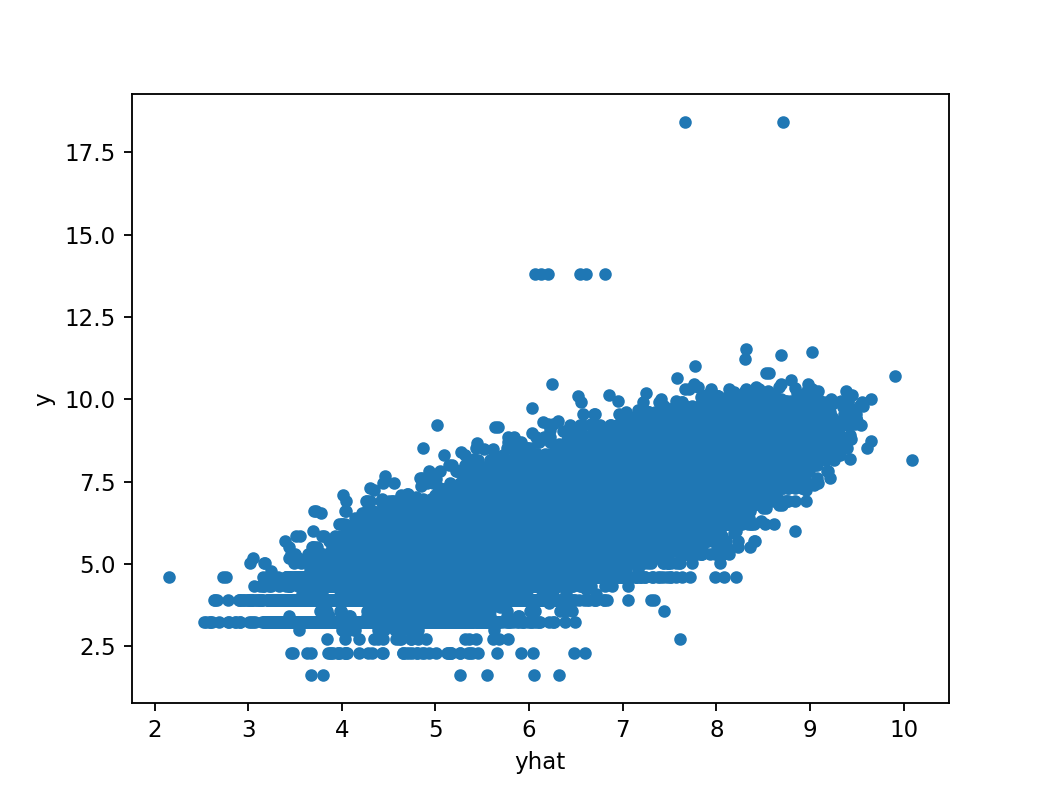

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [12]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

In [13]:
result.get_beta().sort_values()

j
Corn             0.113670
Millet           0.115881
Cornstarch       0.168015
Salt             0.238408
Squash           0.252291
                   ...   
Powdered milk    0.667569
Fresh fish       0.713377
Other citrus     0.725565
Biscuit          0.753227
Dates            0.784102
Name: beta, Length: 61, dtype: float64

<IPython.core.display.Javascript object>


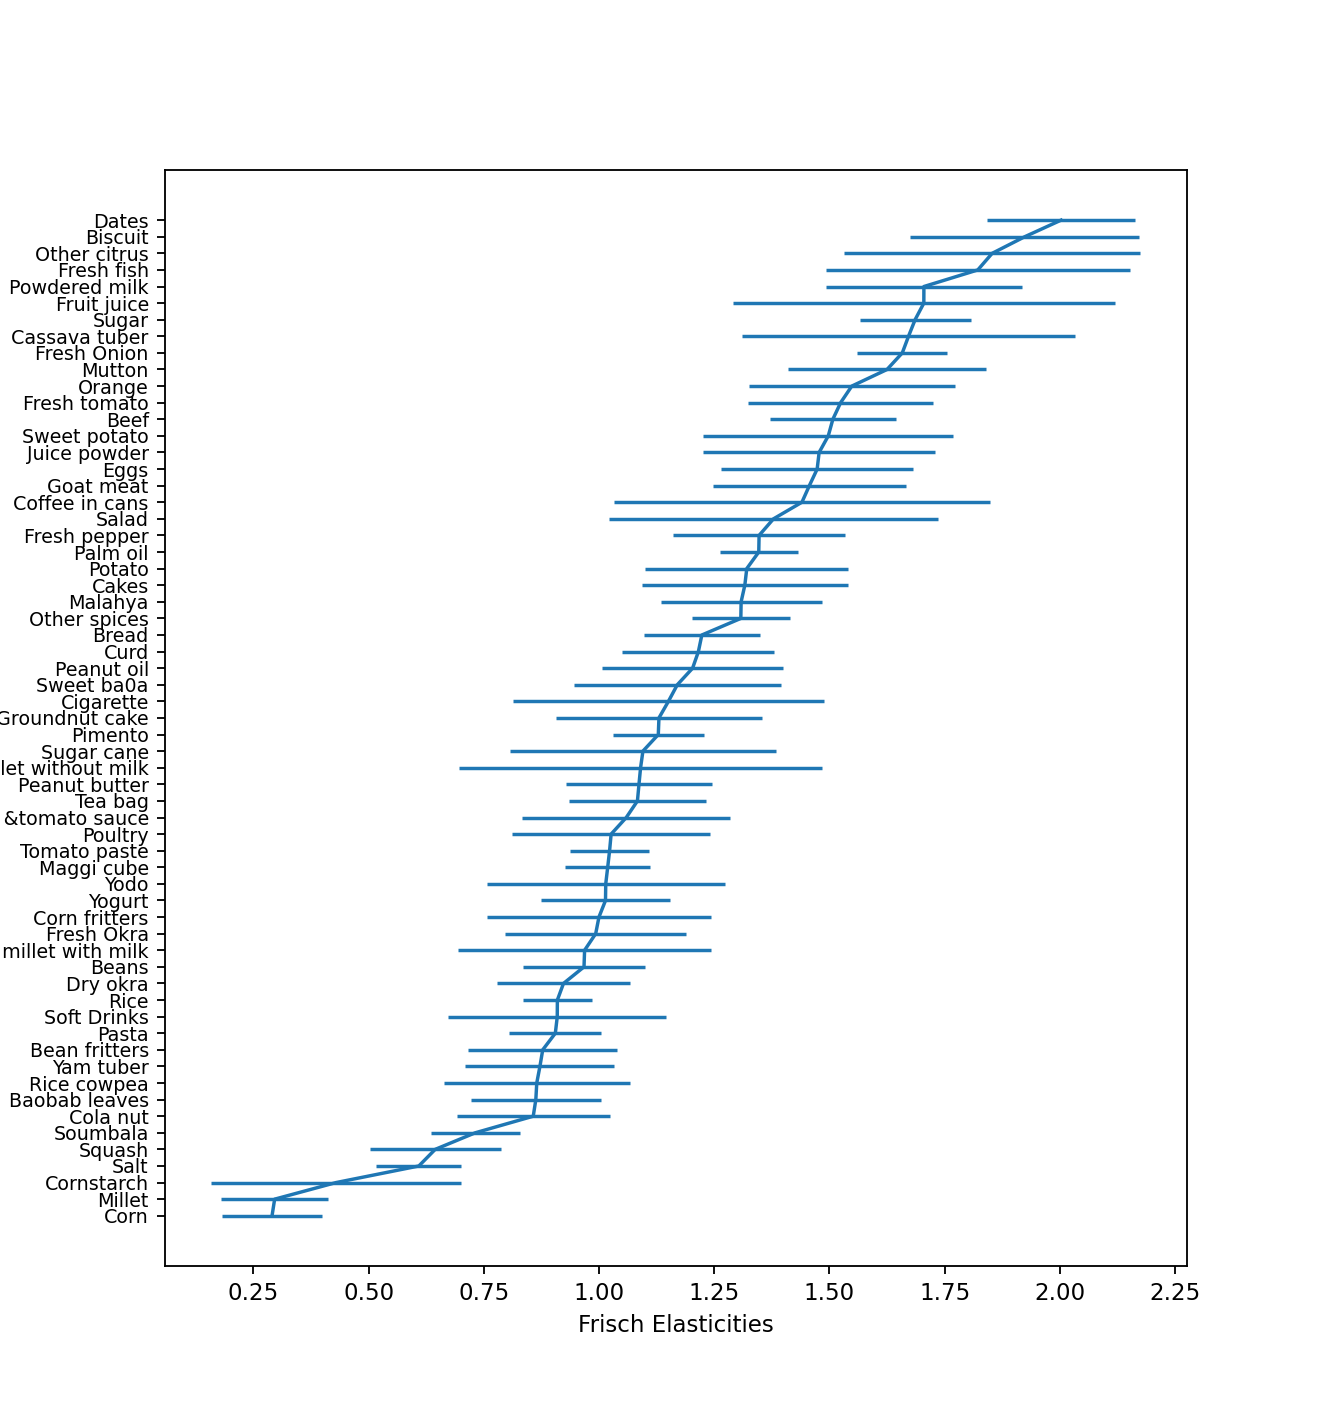

<IPython.core.display.Javascript object>


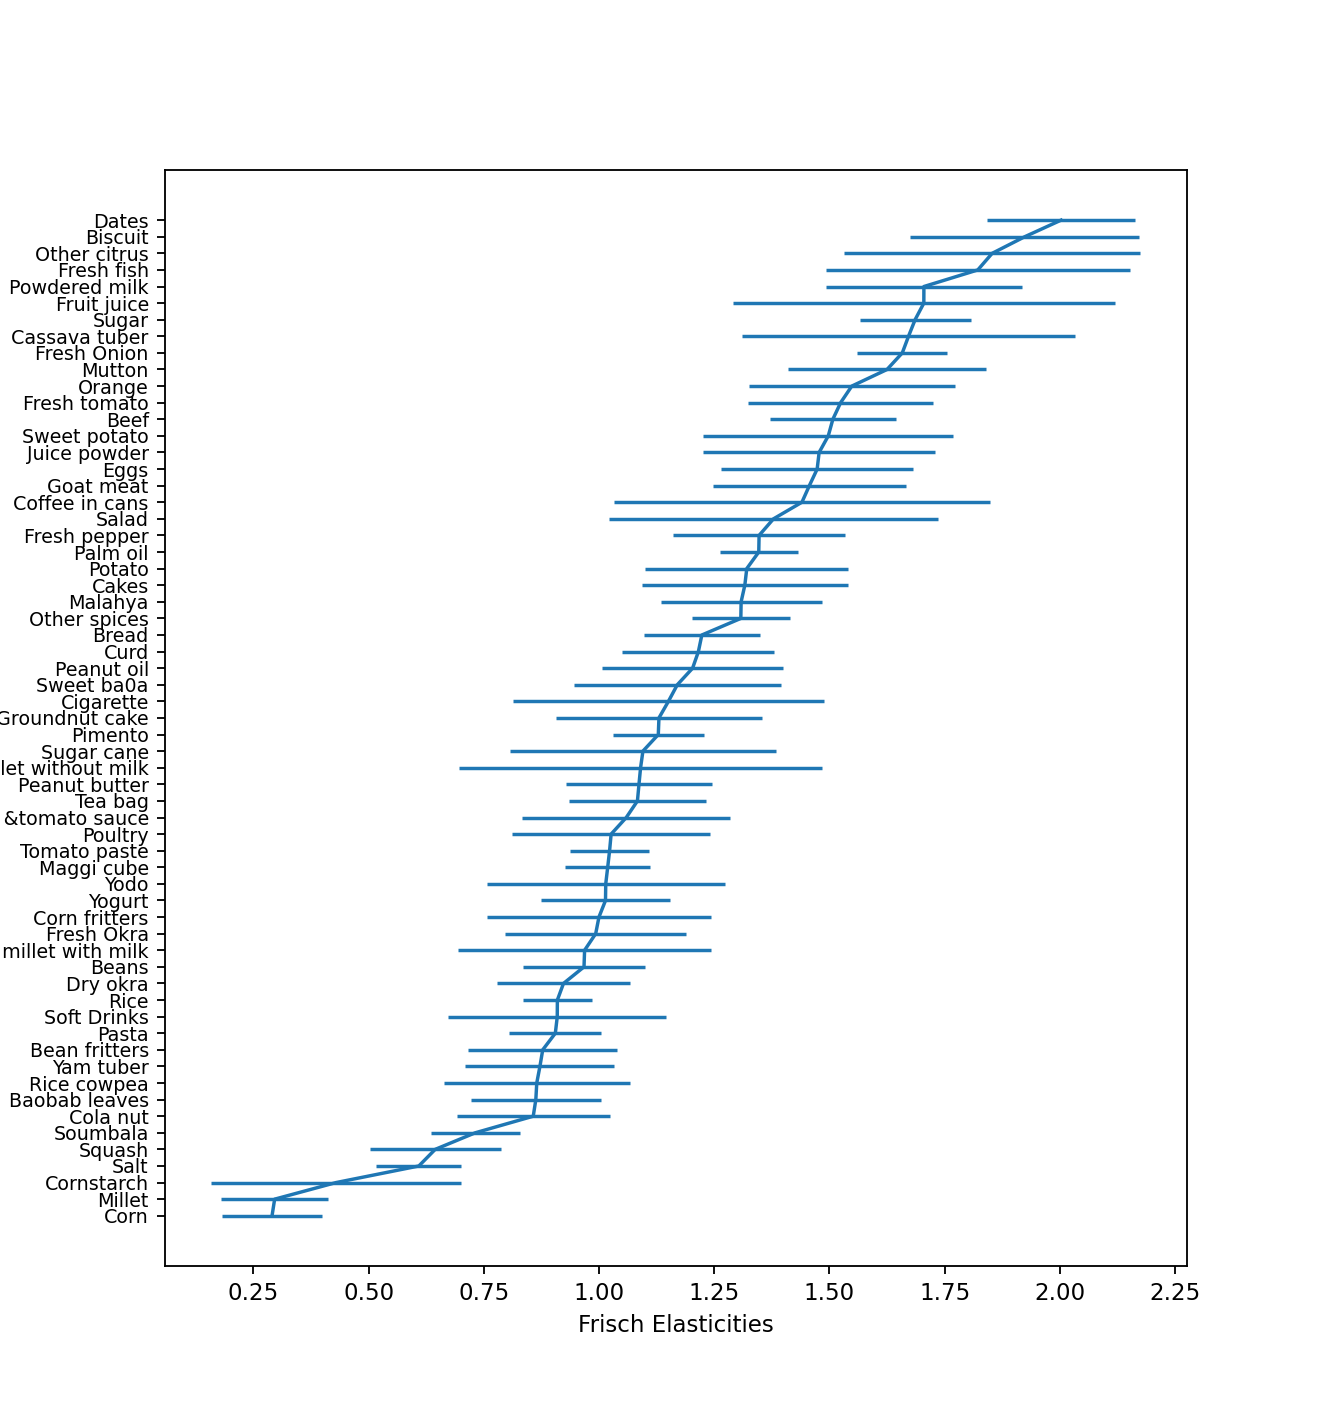

In [14]:
result.graph_beta()

In [15]:
result.gamma

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,Constant
j,,,,,,,,,,,,,,,
Baobab leaves,0.002876,0.087080,0.024776,0.110342,0.036986,0.035971,0.096028,0.056875,0.076398,0.031420,0.017666,0.048583,0.005054,0.071589,-0.316853
Bean fritters,0.001751,0.053997,0.062068,0.088132,0.025083,0.026234,0.044354,0.068347,0.033814,0.065778,0.143900,0.056137,-0.011356,0.015656,-0.230889
Beans,0.065742,0.099401,0.057865,0.019719,0.045392,0.021033,0.124675,0.037876,0.071023,0.050049,0.061067,0.031031,-0.055062,0.041826,-0.338644
Beef,-0.066320,-0.010243,-0.009488,0.023016,0.101104,0.325485,0.179146,-0.066953,-0.016854,0.016370,0.062933,0.155050,0.160964,0.018463,-0.552304
Biscuit,-0.016792,-0.020668,-0.030899,0.067606,0.062117,0.152637,-0.000361,-0.014089,-0.024748,-0.046824,0.119974,0.115475,0.138348,-0.011641,-0.117374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tea bag,-0.054718,-0.012112,0.009655,0.045879,0.065410,0.152292,0.101659,-0.032899,-0.002950,0.033133,0.004932,0.060434,0.030641,-0.019792,-0.306508
Tomato paste,-0.002639,0.000274,0.025459,0.028323,0.078050,0.145294,0.068736,0.001269,-0.021521,0.034017,0.059225,0.093497,0.126565,0.010717,-0.371622
Yam tuber,-0.075946,-0.028175,-0.024232,0.154928,0.064916,0.164918,0.126051,-0.055406,-0.027405,0.067177,0.073436,0.147480,0.141000,0.023074,-0.457719


In [16]:
result.to_pickle('my_estimates.pickle')

In [17]:
import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')